# Churn risk prediction

## 1. Preparation

### 1.1 Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###1.2 Load libraries

In [2]:

import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
#import numpy as np
#plt.style.use('classic')
#import scipy.stats as stats
#from scipy.stats import norm
#from sklearn.linear_model import LinearRegression
#from imblearn.over_sampling import SMOTE
#from sklearn.feature_selection import RFE

#sns.set(style="white")
#sns.set(style="whitegrid", color_codes=True)

### 1.3 Import data

In [3]:
dataset = "/content/drive/MyDrive/CAS-ADS_M2_ProjectWork/M2/hr_2014.csv"
df = pd.read_csv(dataset,header=0)
df

,first_name,last_name,satisfaction,evaluation,project_count,monthly_hours,years_at_company,accident,promotion,department,salary,left
0,Izaak,Lytle,0.38,0.53,2,157,3,0,0,sales,low,1
1,Ronald,Goodteacher,0.41,0.50,2,153,3,0,0,sales,low,1
2,Paetiance,Inthavong,0.10,0.77,6,247,4,0,0,sales,low,1
3,Olivia,Sisay,0.92,0.85,5,259,5,0,0,sales,low,1
4,Daniel,Thomas,0.89,1.00,5,224,5,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,Idraia,Logan,0.40,0.48,2,155,3,0,0,support,low,1
8996,Dedrick,Lopez,0.76,0.83,6,293,6,0,0,support,low,1
8997,Sarah,Tak,0.37,0.53,2,143,3,0,0,support,low,1
8998,Michelle,Ellis,0.11,0.96,6,280,4,0,0,support,low,1


### 1.4 Subsetting
We want to prevent an early departure of well-performing employees and develop a logistic regression model that allows to predict whether a well-performing employee will leave within the next year (y = 1) or not (y = 0).

We define a well-performing employee as follows:
*   evaluation score > 0.6
*   time since employment is at least 3 years
*   number of successfully completed projects is at least 2

In [4]:
sdf = df[(df.evaluation>0.6) & (df.years_at_company>2) & (df.project_count>2)]
a = str(round((100*len(sdf))/len(df)))
b= str(len(sdf))
print("This holds for " + b + " employees.")
print("That is " + a + "% of the total workforce.")


This holds for 4382 employees.
That is 49% of the total workforce.


percentage employees that stay is 74.67 %
percentage of employees that left 25.33 %


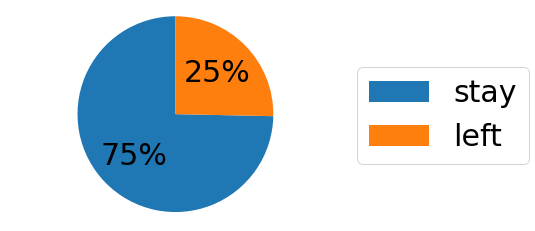

In [5]:
count_stay = len(sdf[sdf['left']==0])
count_left = len(sdf[sdf['left']==1])
pct_of_stay = count_stay/(count_stay+count_left)
print("percentage employees that stay is", round(pct_of_stay*100,2),"%")
pct_of_left = count_left/(count_stay+count_left)
print("percentage of employees that left", round(pct_of_left*100,2),"%")


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'stay', 'left'
sizes = [pct_of_stay, pct_of_left]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%1.0f%%', startangle=90,textprops={'fontsize': 30})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.legend(labels,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize = 30)

plt.show()

### 1.5 Dummy variables

create dummy variables for department and salary

In [6]:
sdf = sdf.iloc[:,2:12]
sdf = pd.get_dummies(sdf)
ref1= "salary_high"
ref2="department_accounting"
sdf = sdf.loc[:, sdf.columns != ref1]
sdf = sdf.loc[:, sdf.columns != ref2]
sdf

,satisfaction,evaluation,project_count,monthly_hours,years_at_company,accident,promotion,left,department_IT,department_RandD,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
2,0.10,0.77,6,247,4,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,0.92,0.85,5,259,5,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,0.89,1.00,5,224,5,0,0,1,0,0,0,0,0,0,1,0,0,1,0
6,0.11,0.81,6,305,4,0,0,1,0,0,0,0,0,0,1,0,0,1,0
10,0.78,0.99,4,255,6,0,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8990,0.73,0.93,5,162,4,0,0,1,0,0,0,0,0,0,0,0,1,1,0
8991,0.72,0.84,5,257,5,0,0,1,0,0,0,0,0,0,0,0,1,0,1
8993,0.85,0.85,4,247,6,0,0,1,0,0,0,0,0,0,0,0,1,1,0
8996,0.76,0.83,6,293,6,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [7]:
sdf['intercept'] = 1
col = sdf.pop('intercept')
sdf.insert(loc= 0 , column= 'intercept', value= col)
sdf

,intercept,satisfaction,evaluation,project_count,monthly_hours,years_at_company,accident,promotion,left,department_IT,department_RandD,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
2,1,0.10,0.77,6,247,4,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,1,0.92,0.85,5,259,5,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,1,0.89,1.00,5,224,5,0,0,1,0,0,0,0,0,0,1,0,0,1,0
6,1,0.11,0.81,6,305,4,0,0,1,0,0,0,0,0,0,1,0,0,1,0
10,1,0.78,0.99,4,255,6,0,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8990,1,0.73,0.93,5,162,4,0,0,1,0,0,0,0,0,0,0,0,1,1,0
8991,1,0.72,0.84,5,257,5,0,0,1,0,0,0,0,0,0,0,0,1,0,1
8993,1,0.85,0.85,4,247,6,0,0,1,0,0,0,0,0,0,0,0,1,1,0
8996,1,0.76,0.83,6,293,6,0,0,1,0,0,0,0,0,0,0,1,0,1,0


final data columns

In [8]:
sdf.columns.values

array(['intercept', 'satisfaction', 'evaluation', 'project_count',
       'monthly_hours', 'years_at_company', 'accident', 'promotion',
       'left', 'department_IT', 'department_RandD', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype=object)

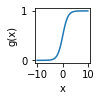

In [9]:
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(1,1))

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)

plt.plot(x,sig)
plt.ylabel('g(x)')
plt.xlabel('x')
plt.show()

### 1.6 Training and test set
To avoid overfitting or underfitting we split the new data frame  into a training and a test set such that both sets roughly have the same attrition rate (fraction of employees who left).


X dataframe with predictor variables

In [10]:
X = sdf.loc[:,sdf.columns != 'left']
X

,intercept,satisfaction,evaluation,project_count,monthly_hours,years_at_company,accident,promotion,department_IT,department_RandD,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
2,1,0.10,0.77,6,247,4,0,0,0,0,0,0,0,0,1,0,0,1,0
3,1,0.92,0.85,5,259,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,1,0.89,1.00,5,224,5,0,0,0,0,0,0,0,0,1,0,0,1,0
6,1,0.11,0.81,6,305,4,0,0,0,0,0,0,0,0,1,0,0,1,0
10,1,0.78,0.99,4,255,6,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8990,1,0.73,0.93,5,162,4,0,0,0,0,0,0,0,0,0,0,1,1,0
8991,1,0.72,0.84,5,257,5,0,0,0,0,0,0,0,0,0,0,1,0,1
8993,1,0.85,0.85,4,247,6,0,0,0,0,0,0,0,0,0,0,1,1,0
8996,1,0.76,0.83,6,293,6,0,0,0,0,0,0,0,0,0,1,0,1,0


y dataframe with outcome variable

In [11]:
y = sdf.loc[:,sdf.columns == 'left']
y

,left
2,1
3,1
4,1
6,1
10,1
...,...
8990,1
8991,1
8993,1
8996,1


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=0)
columns = X_train.columns

print(y_train.describe())
print(y_test.describe())

print('attrition rate training set: ', round(y_train.mean(),2))
print('attrition rate test set: ', round(y_test.mean(),2))

              left
count  2191.000000
mean      0.246463
std       0.431050
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
              left
count  2191.000000
mean      0.260155
std       0.438819
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
attrition rate training set:  left    0.25
dtype: float64
attrition rate test set:  left    0.26
dtype: float64


Attrition rate of the training and test set roughly are the same.

## 2. Regression analysis with StatsModels

###2.1 Load specific librabries

In [13]:
# importing libraries
import statsmodels.api as sm
import pandas as pd

###2.2 Training the model

In [14]:
# building the model and fitting the data

log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.231727
         Iterations 9


In [15]:
# printing the summary table
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                 2191
Model:                          Logit   Df Residuals:                     2172
Method:                           MLE   Df Model:                           18
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.5850
Time:                        23:09:13   Log-Likelihood:                -507.71
converged:                       True   LL-Null:                       -1223.5
Covariance Type:            nonrobust   LLR p-value:                2.402e-293
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                -32.1492      1.823    -17.637      0.000     -35.722     -28.577
satisfaction              -0.0281      0.328     -0.086      0.932      -0.671       0.615
eval

###2.3 Prediction

In [16]:
# performing predictions on the test datdaset
yhat = log_reg.predict(X_test)
prediction = list(map(round, yhat))
  
y_test_list = y_test.values.tolist()

final_y_test_list = []
for i in y_test_list:
    for j in i:
        final_y_test_list.append(j)

# comparing original and predicted values of y
print('Actual values:', final_y_test_list)
print('Predictions :', prediction)

Actual values: [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 

###2.4 Confusion Matrix

In [17]:
from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)
  
# confusion matrix
cm = confusion_matrix(y_test, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))




Confusion Matrix : 
 [[1519  102]
 [ 114  456]]
Test accuracy =  0.9014148790506618


In [18]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

print(TN,FP,FN,TP)

1519 102 114 456


In [19]:
Accuracy=(TP+TN)/(TP+FP+FN+TN)
print('Accuracy =', Accuracy)

PR= TP/(TP+FP)
print('Precision =',PR)

TPR = TP/(TP+FN)
print('true positive rate TPR (Recall) =',TPR)

FPR = FP/(FP+TN)
print('false positive rate FPR =',FPR)

Accuracy = 0.9014148790506618
Precision = 0.8172043010752689
true positive rate TPR (Recall) = 0.8
false positive rate FPR = 0.06292412091301666


###2.5 Control with test set

In [20]:
x_sat_train=X_train['satisfaction']
x_sat_train=sm.add_constant(x_sat_train)
y_var_train=y_train['left']

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [21]:
x_sat_test=X_test['satisfaction']
x_sat_test=sm.add_constant(x_sat_test)
y_var_test=y_test['left']

In [22]:
Logit_sat=sm.Logit(y_var_train, x_sat_train)
results_sat=Logit_sat.fit()
print(results_sat.summary())

Optimization terminated successfully.
         Current function value: 0.508130
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                 2191
Model:                          Logit   Df Residuals:                     2189
Method:                           MLE   Df Model:                            1
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                 0.09005
Time:                        23:09:13   Log-Likelihood:                -1113.3
converged:                       True   LL-Null:                       -1223.5
Covariance Type:            nonrobust   LLR p-value:                 7.584e-50
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3645      0.109      3.352      0.001       0.151       0.578
satisfaction    -2.6071

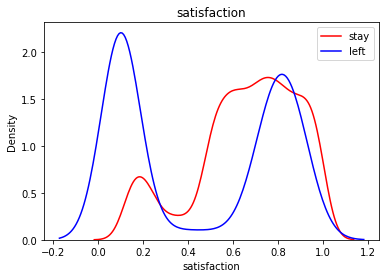

In [23]:
sdf_stay = sdf[(sdf.left==0)]
sdf_left = sdf[(sdf.left==1)]
 
fig = sns.kdeplot(sdf_stay['satisfaction'],  color="r", label='stay')
fig = sns.kdeplot(sdf_left['satisfaction'],  color="b",  label='left')
plt.legend()
plt.title('satisfaction')
plt.show()





In [24]:
X_train['bins'] = pd.cut(x=X_train['satisfaction'],bins=[0,0.333333,0.666667,1])
X_test['bins'] = pd.cut(x=X_test['satisfaction'],bins=[0,0.333333,0.666667,1])


###2.6 Optimisation

In [25]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

X_train

,intercept,satisfaction,evaluation,project_count,monthly_hours,years_at_company,accident,promotion,department_IT,department_RandD,...,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,"bins_(0.0, 0.333]","bins_(0.333, 0.667]","bins_(0.667, 1.0]"
3481,1,0.73,0.81,5,173,3,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
8941,1,0.10,0.90,7,269,4,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8557,1,0.84,0.87,4,246,6,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
7001,1,0.56,0.71,5,244,3,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
898,1,0.83,0.98,4,249,5,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093,1,0.71,0.77,4,192,4,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
6913,1,0.64,0.63,3,156,6,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
3428,1,0.62,0.61,6,103,4,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
5534,1,0.82,0.75,3,161,3,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [26]:
ref3= "bins_(0.333, 0.667]"
satisfaction="satisfaction"
X_train = X_train.loc[:, X_train.columns != ref3]
X_train = X_train.loc[:, X_train.columns != satisfaction]
X_test = X_test.loc[:, X_test.columns != ref3]
X_test = X_test.loc[:, X_test.columns != satisfaction]
X_train = X_train.rename(columns={'bins_(0.0, 0.333]': 'satisfaction_low', 'bins_(0.667, 1.0]': 'satisfaction_high'})
X_test = X_test.rename(columns={'bins_(0.0, 0.333]': 'satisfaction_low', 'bins_(0.667, 1.0]': 'satisfaction_high'})


In [27]:
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.219431
         Iterations 9


In [28]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                 2191
Model:                          Logit   Df Residuals:                     2171
Method:                           MLE   Df Model:                           19
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.6070
Time:                        23:09:14   Log-Likelihood:                -480.77
converged:                       True   LL-Null:                       -1223.5
Covariance Type:            nonrobust   LLR p-value:                5.933e-304
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                -32.5065      1.819    -17.873      0.000     -36.071     -28.942
evaluation                11.4302      1.012     11.300      0.000       9.448      13.413
proj

In [29]:
# performing predictions on the test datdaset
yhat = log_reg.predict(X_test)
prediction = list(map(round, yhat))
  
y_test_list = y_test.values.tolist()

final_y_test_list = []
for i in y_test_list:
    for j in i:
        final_y_test_list.append(j)

# comparing original and predicted values of y
print('Actual values:', final_y_test_list)
print('Predictions :', prediction)

Actual values: [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 

In [30]:
# confusion matrix
cm = confusion_matrix(y_test, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))

Confusion Matrix : 
 [[1527   94]
 [  92  478]]
Test accuracy =  0.9151072569602922


In [31]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

print(TN,FP,FN,TP)

1527 94 92 478


In [32]:
Accuracy=(TP+TN)/(TP+FP+FN+TN)
print('Accuracy =',Accuracy)

PR= TP/(TP+FP)
print('Precision =',PR)

TPR = TP/(TP+FN)
print('true positive rate TPR (Recall) =',TPR)

FPR = FP/(FP+TN)
print('false positive rate FPR =',FPR)




Accuracy = 0.9151072569602922
Precision = 0.8356643356643356
true positive rate TPR (Recall) = 0.8385964912280702
false positive rate FPR = 0.05798889574336829
